In [14]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import time
import os

spark = SparkSession.builder.appName("MeasureRunTime").getOrCreate()


In [15]:
for size in [100, 1000, 5000, 10000, 20000]:
    with open(f"data_{size}.csv", "w") as f:
        f.write("col\n")
        for i in range(size):
            f.write(f"{i % 10}\n")  # Keeps grouping values small


In [16]:
for size in [100, 1000, 5000, 10000, 20000]:
    os.system(f"hdfs dfs -put -f data_{size}.csv /user/root/")


In [17]:
sizes = [100, 1000, 5000, 10000, 20000]
run_times = []

for size in sizes:
    df = spark.read.csv(f"/user/root/data_{size}.csv", header=True, inferSchema=True)

    start_time = time.time()
    df.groupBy("col").avg("col").show()
    end_time = time.time()

    duration = end_time - start_time
    run_times.append(duration)

    print(f"File with {size} rows took {duration:.4f} seconds")

+---+--------+
|col|avg(col)|
+---+--------+
|  1|     1.0|
|  6|     6.0|
|  3|     3.0|
|  4|     4.0|
|  8|     8.0|
|  5|     5.0|
|  2|     2.0|
|  7|     7.0|
|  0|     0.0|
|  9|     9.0|
+---+--------+

File with 100 rows took 2.2430 seconds
+---+--------+
|col|avg(col)|
+---+--------+
|  1|     1.0|
|  6|     6.0|
|  3|     3.0|
|  4|     4.0|
|  8|     8.0|
|  5|     5.0|
|  2|     2.0|
|  7|     7.0|
|  0|     0.0|
|  9|     9.0|
+---+--------+

File with 1000 rows took 0.6440 seconds
+---+--------+
|col|avg(col)|
+---+--------+
|  1|     1.0|
|  6|     6.0|
|  3|     3.0|
|  4|     4.0|
|  8|     8.0|
|  5|     5.0|
|  2|     2.0|
|  7|     7.0|
|  0|     0.0|
|  9|     9.0|
+---+--------+

File with 5000 rows took 0.5281 seconds
+---+--------+
|col|avg(col)|
+---+--------+
|  1|     1.0|
|  6|     6.0|
|  3|     3.0|
|  4|     4.0|
|  8|     8.0|
|  5|     5.0|
|  2|     2.0|
|  7|     7.0|
|  0|     0.0|
|  9|     9.0|
+---+--------+

File with 10000 rows took 0.4637 seco

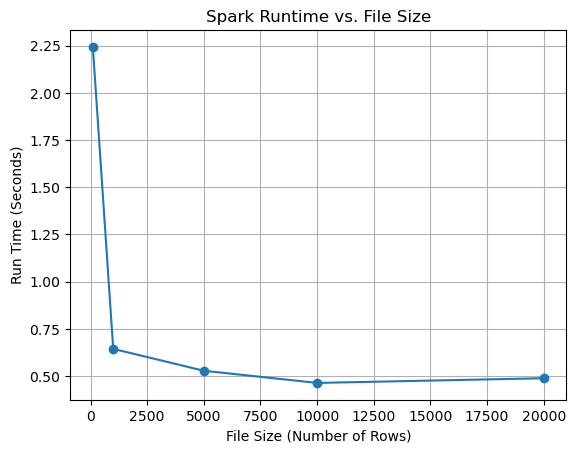

In [18]:
plt.plot(sizes, run_times, marker='o')
plt.xlabel("File Size (Number of Rows)")
plt.ylabel("Run Time (Seconds)")
plt.title("Spark Runtime vs. File Size")
plt.grid(True)
plt.show()